In [12]:
from fynesse import access, assess, address

from functools import partial
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tabulate import tabulate

In [13]:
from config import *

## Core

In [6]:
df = pd.read_csv('./data/core_eval.csv')

In [7]:
df.groupby('clf').mean().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']].round(decimals=3)

,seed,accuracy,f1,precision,recall,accuracy_unseen,f1_unseen,precision_unseen,recall_unseen
clf,,,,,,,,,
KNN,41.4,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000
DT,41.4,0.997,0.997,0.997,0.997,0.993,0.993,0.993,0.993
RF,41.4,0.999,0.999,0.999,0.999,0.999,0.999,0.999,0.999
MLP,41.4,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995
SVM,41.4,0.997,0.997,0.997,0.997,0.996,0.996,0.996,0.996


In [8]:
df.groupby('clf').std().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']].round(decimals=3)

,seed,accuracy,f1,precision,recall,accuracy_unseen,f1_unseen,precision_unseen,recall_unseen
clf,,,,,,,,,
KNN,56.332,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000
DT,56.332,0.003,0.003,0.003,0.003,0.005,0.005,0.005,0.005
RF,56.332,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
MLP,56.332,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004
SVM,56.332,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003


### Few-shot Learning

In [107]:
df = pd.read_csv('./data/fs_eval.csv')
mean = df.groupby(['clf', 'train_size']).mean().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']]
std = df.groupby(['clf', 'train_size']).std().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']]

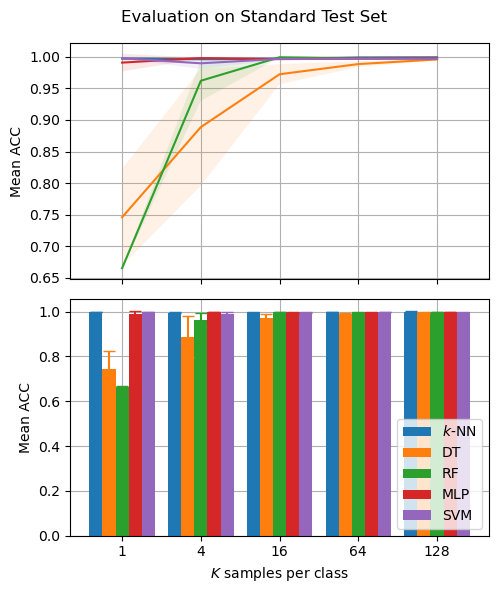

In [108]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

K = (1, 4, 16, 64, 128)

accuracies = {
    '$k$-NN': mean.loc['KNN', 'accuracy'].values,
    'DT': mean.loc['DT', 'accuracy'].values,
    'RF': mean.loc['RF', 'accuracy'].values,
    'MLP': mean.loc['MLP', 'accuracy'].values,
    'SVM': mean.loc['SVM', 'accuracy'].values
}

stds = {
    '$k$-NN': std.loc['KNN', 'accuracy'].values,
    'DT': std.loc['DT', 'accuracy'].values,
    'RF': std.loc['RF', 'accuracy'].values,
    'MLP': std.loc['MLP', 'accuracy'].values,
    'SVM': std.loc['SVM', 'accuracy'].values
}

x = np.arange(len(K))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = -1  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$K$ samples per class')
ax.set_ylabel('Mean ACC')

ax.set_xticks(x + width, K)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Standard Test Set')
plt.tight_layout()
plt.savefig('./figures/fs/fs.png')
plt.show()

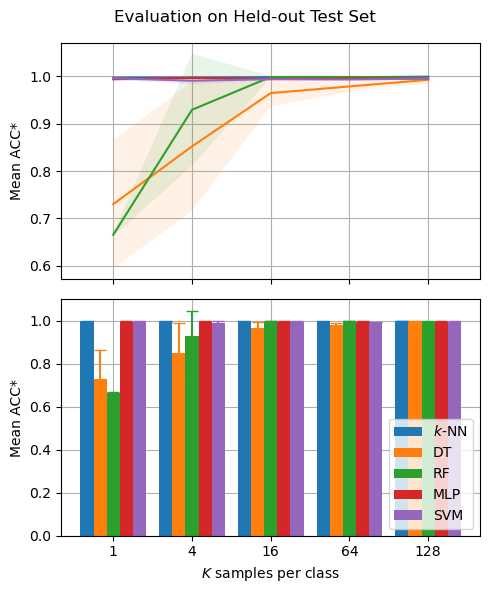

In [109]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

K = (1, 4, 16, 64, 128)

accuracies = {
    '$k$-NN': mean.loc['KNN', 'accuracy_unseen'].values,
    'DT': mean.loc['DT', 'accuracy_unseen'].values,
    'RF': mean.loc['RF', 'accuracy_unseen'].values,
    'MLP': mean.loc['MLP', 'accuracy_unseen'].values,
    'SVM': mean.loc['SVM', 'accuracy_unseen'].values
}

stds = {
    '$k$-NN': std.loc['KNN', 'accuracy_unseen'].values,
    'DT': std.loc['DT', 'accuracy_unseen'].values,
    'RF': std.loc['RF', 'accuracy_unseen'].values,
    'MLP': std.loc['MLP', 'accuracy_unseen'].values,
    'SVM': std.loc['SVM', 'accuracy_unseen'].values
}

x = np.arange(len(K))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC*')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = -1  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$K$ samples per class')
ax.set_ylabel('Mean ACC*')

ax.set_xticks(x + width, K)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Held-out Test Set')
plt.tight_layout()
plt.savefig('./figures/fs/fs_unseen.png')
plt.show()

## Extension

In [101]:
df = pd.read_csv('./data/ext_eval.csv')

In [102]:
df.groupby('clf').mean().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']].round(decimals=3)

,seed,accuracy,f1,precision,recall,accuracy_unseen,f1_unseen,precision_unseen,recall_unseen
clf,,,,,,,,,
KNN,41.4,0.998,0.998,0.998,0.998,0.987,0.986,0.990,0.987
DT,41.4,0.993,0.993,0.993,0.993,0.971,0.971,0.972,0.971
RF,41.4,0.994,0.994,0.995,0.994,0.955,0.951,0.964,0.955
MLP,41.4,0.998,0.998,0.998,0.998,0.994,0.994,0.994,0.994
SVM,41.4,0.987,0.987,0.988,0.987,0.972,0.970,0.980,0.972


In [103]:
df.groupby('clf').std().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']].round(decimals=3)

,seed,accuracy,f1,precision,recall,accuracy_unseen,f1_unseen,precision_unseen,recall_unseen
clf,,,,,,,,,
KNN,56.332,0.002,0.002,0.002,0.002,0.015,0.017,0.010,0.015
DT,56.332,0.002,0.002,0.002,0.002,0.026,0.026,0.026,0.026
RF,56.332,0.002,0.002,0.002,0.002,0.014,0.016,0.010,0.014
MLP,56.332,0.001,0.001,0.001,0.001,0.005,0.005,0.004,0.005
SVM,56.332,0.002,0.002,0.002,0.002,0.023,0.025,0.016,0.023


### Few-shot Learning

In [110]:
df = pd.read_csv('./data/fs_ext_eval.csv')
mean = df.groupby(['clf', 'train_size']).mean().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']]
std = df.groupby(['clf', 'train_size']).std().loc[['KNN', 'DT', 'RF', 'MLP', 'SVM']]

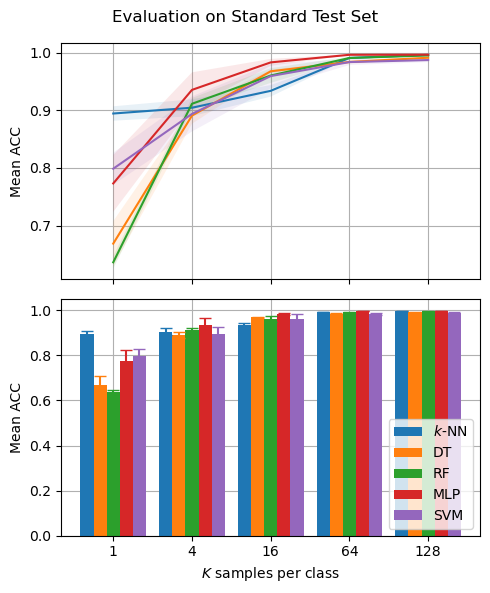

In [111]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

K = (1, 4, 16, 64, 128)

accuracies = {
    '$k$-NN': mean.loc['KNN', 'accuracy'].values,
    'DT': mean.loc['DT', 'accuracy'].values,
    'RF': mean.loc['RF', 'accuracy'].values,
    'MLP': mean.loc['MLP', 'accuracy'].values,
    'SVM': mean.loc['SVM', 'accuracy'].values
}

stds = {
    '$k$-NN': std.loc['KNN', 'accuracy'].values,
    'DT': std.loc['DT', 'accuracy'].values,
    'RF': std.loc['RF', 'accuracy'].values,
    'MLP': std.loc['MLP', 'accuracy'].values,
    'SVM': std.loc['SVM', 'accuracy'].values
}

x = np.arange(len(K))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = -1  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$K$ samples per class')
ax.set_ylabel('Mean ACC')

ax.set_xticks(x + width, K)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Standard Test Set')
plt.tight_layout()
plt.savefig('./figures/fs/fs_ext.png')
plt.show()

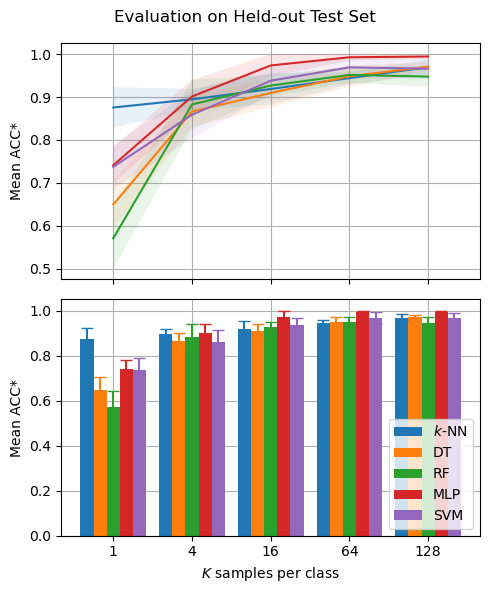

In [112]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

K = (1, 4, 16, 64, 128)

accuracies = {
    '$k$-NN': mean.loc['KNN', 'accuracy_unseen'].values,
    'DT': mean.loc['DT', 'accuracy_unseen'].values,
    'RF': mean.loc['RF', 'accuracy_unseen'].values,
    'MLP': mean.loc['MLP', 'accuracy_unseen'].values,
    'SVM': mean.loc['SVM', 'accuracy_unseen'].values
}

stds = {
    '$k$-NN': std.loc['KNN', 'accuracy_unseen'].values,
    'DT': std.loc['DT', 'accuracy_unseen'].values,
    'RF': std.loc['RF', 'accuracy_unseen'].values,
    'MLP': std.loc['MLP', 'accuracy_unseen'].values,
    'SVM': std.loc['SVM', 'accuracy_unseen'].values
}

x = np.arange(len(K))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC*')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = -1  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$K$ samples per class')
ax.set_ylabel('Mean ACC*')

ax.set_xticks(x + width, K)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Held-out Test Set')
plt.tight_layout()
plt.savefig('./figures/fs/fs_ext_unseen.png')
plt.show()

## Feature Construction

In [14]:
proc = ['instructions']

cache = ['cache-misses',
'cache-references',
'L1-dcache-load-misses',
'L1-dcache-loads',
'L1-dcache-stores',
'LLC-load-misses',
'LLC-loads',
'LLC-store-misses',
'LLC-stores']

flop = ['fp_arith_inst_retired.128b_packed_single',
'fp_arith_inst_retired.256b_packed_single',
'fp_arith_inst_retired.512b_packed_single',
'fp_arith_inst_retired.scalar_double',
'fp_arith_inst_retired.scalar_single']

flop_excl = ['fp_arith_inst_retired.256b_packed_single',
'fp_arith_inst_retired.512b_packed_single',
'fp_arith_inst_retired.scalar_double',
'fp_arith_inst_retired.scalar_single']

### Effect of Number of Events

In [30]:
df1 = pd.read_csv('./data/feature_eval_1.csv')
df2 = pd.read_csv('./data/feature_eval_2.csv')
df4 = pd.read_csv('./data/feature_eval_4.csv')

In [31]:
def organize(df):
    
    df['proc'] = False
    for proc_event in proc:
        df['proc'] = df['events'].apply(lambda events: proc_event in events) | df['proc']

    df['cache'] = False
    for cache_event in cache:
        df['cache'] = df['events'].apply(lambda events: cache_event in events) | df['cache']

    df['flop'] = False
    for flop_event in flop:
        df['flop'] = df['events'].apply(lambda events: flop_event in events) | df['flop']
    
    df['flop_excl'] = False
    for flop_event in flop_excl:
        df['flop_excl'] = df['events'].apply(lambda events: flop_event in events) | df['flop_excl']

    return df

In [32]:
df1 = organize(df1)
df2 = organize(df2)
df4 = organize(df4)

df1.head()

,clf,events,n_bins,seed,accuracy,accuracy_unseen,proc,cache,flop,flop_excl
0,KNN,"('instructions',)",1,0,0.955892,0.935000,True,False,False,False
1,DT,"('instructions',)",1,0,0.960286,0.975625,True,False,False,False
2,RF,"('instructions',)",1,0,0.962077,0.975000,True,False,False,False
3,MLP,"('instructions',)",1,0,0.830892,0.811250,True,False,False,False
4,SVM,"('instructions',)",1,0,0.186849,0.186875,True,False,False,False


In [33]:
df4.drop(['clf', 'events'], axis=1).groupby(['flop_excl']).std().loc[True]

n_bins             48.334041
seed               50.387859
accuracy            0.077470
accuracy_unseen     0.083316
proc                0.424617
cache               0.119554
flop                0.000000
Name: True, dtype: float64

#### Plotting

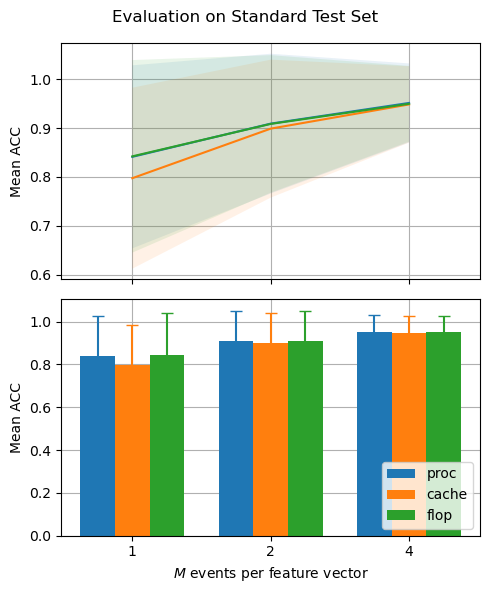

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

M = (1, 2, 4)

accuracies = {
    'proc': np.array([0.841164, 0.909117, 0.951443]),
    'cache': np.array([0.797534, 0.898871, 0.948388]),
    # 'flop': np.array([0.745538, 0.902648, 0.949282]),
    'flop': np.array([0.842205, 0.908514, 0.949690])
}

stds = {
    'proc': np.array([0.187117, 0.142895, 0.080761]),
    'cache': np.array([0.185040, 0.141066, 0.078035]),
    # 'flop': np.array([0.262021, 0.141422, 0.077189]),
    'flop': np.array([0.196863, 0.140708, 0.077470])
}

x = np.arange(len(M))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = 0  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$M$ events per feature vector')
ax.set_ylabel('Mean ACC')

ax.set_xticks(x + width, M)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Standard Test Set')
plt.tight_layout()
plt.savefig('./figures/features/n_events.png')
plt.show()

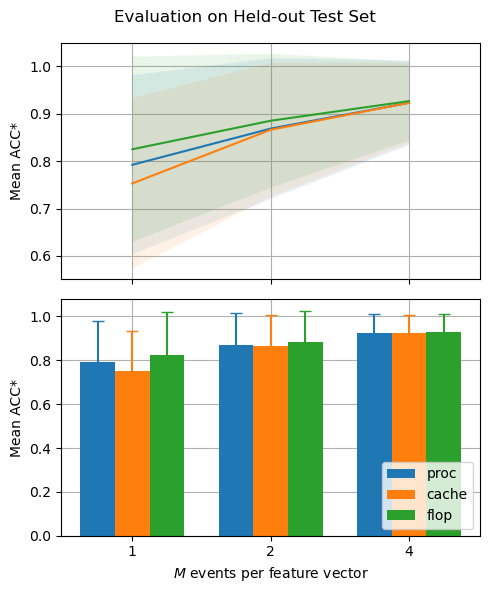

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

M = (1, 2, 4)

accuracies = {
    'proc': np.array([0.792455, 0.868873, 0.923342]),
    'cache': np.array([0.753244, 0.866386, 0.923315]),
    # 'flop': np.array([0.731239, 0.878799, 0.926048]),
    'flop': np.array([0.825284, 0.885494, 0.926938])
}

stds = {
    'proc': np.array([0.188974, 0.148548, 0.089257]),
    'cache': np.array([0.180029, 0.141764, 0.084745]),
    # 'flop': np.array([0.257321, 0.141897, 0.083157]),
    'flop': np.array([0.195386, 0.141376, 0.083316])
}

x = np.arange(len(M))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC*')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = 0  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$M$ events per feature vector')
ax.set_ylabel('Mean ACC*')

ax.set_xticks(x + width, M)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')


fig.suptitle('Evaluation on Held-out Test Set')
plt.tight_layout()
plt.savefig('./figures/features/n_events_unseen.png')
plt.show()

### Individual Events

In [44]:
# run only once

df = pd.read_csv('./data/feature_eval_1.csv')

for event in EVENTS:
    df[event] = df['events'].apply(lambda events: event in events)

df = df.drop(['clf', 'events'],axis=1)

In [48]:
memo = dict()

for event in EVENTS:
    memo[event] = (df.groupby([event]).mean().loc[True]['accuracy'], df.groupby([event]).std().loc[True]['accuracy'])

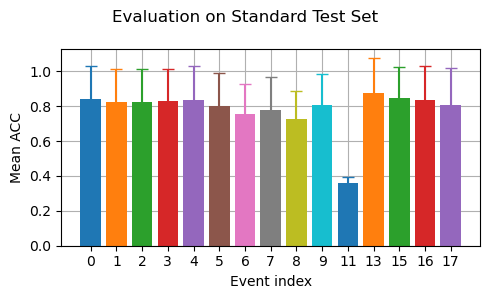

In [38]:
fig, ax = plt.subplots(figsize=(5, 3))

for i, event in enumerate(EVENTS):
    acc, std = memo[event]
    rects = ax.bar(i, acc, label=event)
    ax.errorbar(i, acc, yerr=std, capsize=4)

# ax.set_ylim(0.9, 0.96)


ax.set_xlabel('Event index')
ax.set_ylabel('Mean ACC')

ax.set_xticks(range(len(EVENTS)), [EVENT_TO_IDX[event] for event in EVENTS])

ax.set_axisbelow(True)
ax.grid()

fig.suptitle('Evaluation on Standard Test Set')
plt.tight_layout()
plt.savefig('./figures/features/events.png')
plt.show()

In [39]:
memo = dict()

for event in EVENTS:
    memo[event] = (df.groupby([event]).mean().loc[True]['accuracy_unseen'], df.groupby([event]).std().loc[True]['accuracy_unseen'])

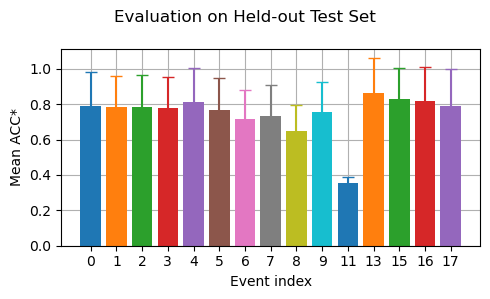

In [40]:
fig, ax = plt.subplots(figsize=(5, 3))

for i, event in enumerate(EVENTS):
    acc, std = memo[event]
    rects = ax.bar(i, acc, label=event)
    ax.errorbar(i, acc, yerr=std, capsize=4)

# ax.set_ylim(0.9, 0.96)


ax.set_xlabel('Event index')
ax.set_ylabel('Mean ACC*')

ax.set_xticks(range(len(EVENTS)), [EVENT_TO_IDX[event] for event in EVENTS])

ax.set_axisbelow(True)
ax.grid()

fig.suptitle('Evaluation on Held-out Test Set')
plt.tight_layout()
plt.savefig('./figures/features/events_unseen.png')
plt.show()

### Effect of Bin Size

In [41]:
# run only once

df = pd.read_csv('./data/feature_eval_1.csv')

df = organize(df).drop(['clf', 'events'], axis=1)
df.head()

,n_bins,seed,accuracy,accuracy_unseen,proc,cache,flop,flop_excl
0,1,0,0.955892,0.935000,True,False,False,False
1,1,0,0.960286,0.975625,True,False,False,False
2,1,0,0.962077,0.975000,True,False,False,False
3,1,0,0.830892,0.811250,True,False,False,False
4,1,0,0.186849,0.186875,True,False,False,False


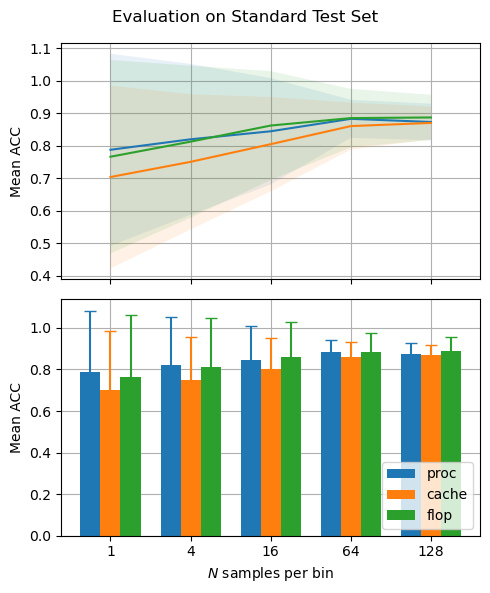

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

N = (1, 4, 16, 64, 128)

accuracies = {
    'proc': df.groupby(['proc', 'n_bins']).mean().loc[True]['accuracy'].values,
    'cache': df.groupby(['cache', 'n_bins']).mean().loc[True]['accuracy'].values,
    # 'flop': df.groupby(['flop', 'n_bins']).mean().loc[True]['accuracy'].values,
    'flop': df.groupby(['flop_excl', 'n_bins']).mean().loc[True]['accuracy'].values,
}

stds = {
    'proc': df.groupby(['proc', 'n_bins']).std().loc[True]['accuracy'].values,
    'cache': df.groupby(['cache', 'n_bins']).std().loc[True]['accuracy'].values,
    # 'flop': df.groupby(['flop', 'n_bins']).std().loc[True]['accuracy'].values,
    'flop': df.groupby(['flop_excl', 'n_bins']).std().loc[True]['accuracy'].values,
}

x = np.arange(len(N))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = 0  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$N$ samples per bin')
ax.set_ylabel('Mean ACC')

ax.set_xticks(x + width, N)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')

fig.suptitle('Evaluation on Standard Test Set')
plt.tight_layout()
plt.savefig('./figures/features/bin_size.png')
plt.show()

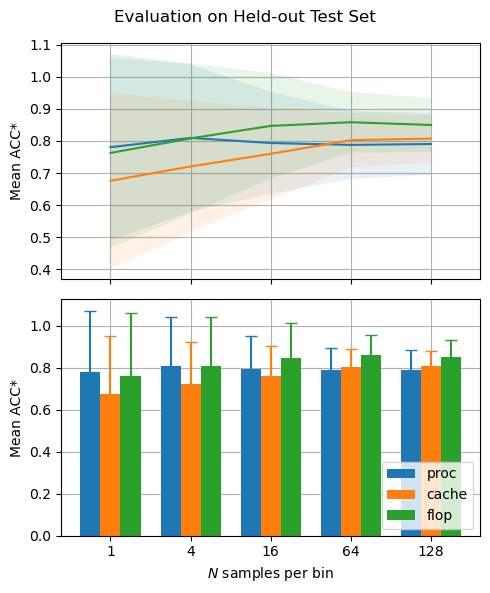

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(5, 6), sharex=True)

N = (1, 4, 16, 64, 128)

accuracies = {
    'proc': df.groupby(['proc', 'n_bins']).mean().loc[True]['accuracy_unseen'].values,
    'cache': df.groupby(['cache', 'n_bins']).mean().loc[True]['accuracy_unseen'].values,
    # 'flop': df.groupby(['flop', 'n_bins']).mean().loc[True]['accuracy_unseen'].values,
    'flop': df.groupby(['flop_excl', 'n_bins']).mean().loc[True]['accuracy_unseen'].values,
}

stds = {
    'proc': df.groupby(['proc', 'n_bins']).std().loc[True]['accuracy_unseen'].values,
    'cache': df.groupby(['cache', 'n_bins']).std().loc[True]['accuracy_unseen'].values,
    # 'flop': df.groupby(['flop', 'n_bins']).std().loc[True]['accuracy_unseen'].values,
    'flop': df.groupby(['flop_excl', 'n_bins']).std().loc[True]['accuracy_unseen'].values,
}

x = np.arange(len(N))  # the label locations

# the line plot above
ax = axes[0]

for classifier, acc in accuracies.items():
    offset = 1 / (len(accuracies) + 1)
    ax.plot(x+offset, acc)
    err = stds[classifier]
    ax.fill_between(x+offset, acc-err, acc+err, alpha=0.1)

ax.set_ylabel('Mean ACC*')

ax.set_axisbelow(True)
ax.grid()


# the bar plot below
ax = axes[1]

width = 1 / (len(accuracies) + 1)  # the width of the bars
multiplier = 0  # manually adjust this

for classifier, acc in accuracies.items():
    offset = width * multiplier
    ax.bar(x + offset, acc, width, label=classifier)
    ax.errorbar(x + offset, acc, yerr=stds[classifier], capsize=4, ls='none')
    multiplier += 1

ax.set_xlabel('$N$ samples per bin')
ax.set_ylabel('Mean ACC*')

ax.set_xticks(x + width, N)

ax.set_axisbelow(True)
ax.grid()

ax.legend(loc='lower right')

fig.suptitle('Evaluation on Held-out Test Set')
plt.tight_layout()
plt.savefig('./figures/features/bin_size_unseen.png')
plt.show()